In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("archive.zip")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check missing values
df.isnull().sum()

# Encode Genre column
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [6]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


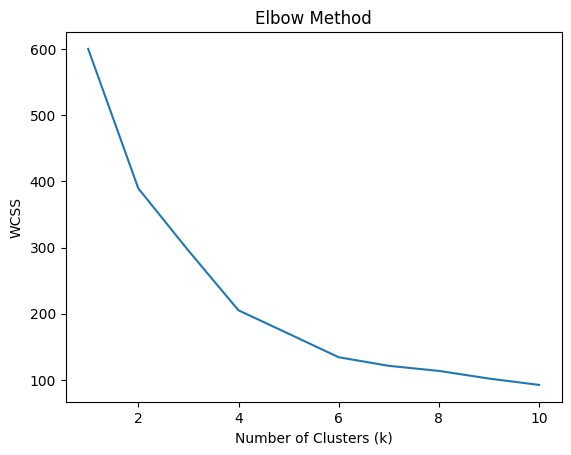

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [10]:
# Encode Genre
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Feature selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,68.775862,NaN,55.275862,47.620690,41.706897
1,161.025000,NaN,32.875000,86.100000,81.525000
2,23.461538,NaN,25.769231,26.115385,74.846154
3,86.377778,NaN,26.733333,54.311111,40.911111
4,166.870968,NaN,44.387097,89.774194,18.483871


In [12]:
df.to_csv("customer_segments.csv", index=False)
